In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = '/content/avoidable_mortality_dataset.xlsx'
xls = pd.ExcelFile(file_path)
table_1 = pd.read_excel(xls, 'Table_1', skiprows=3)

In [ ]:
table_1


,Measure,Year,Sex,Decile,Deaths,Rate,Lower CI,Upper CI
0,Avoidable mortality,2001,Males,1,12786.0,787.1,773.3,800.9
1,Avoidable mortality,2001,Males,2,10373.0,634.7,622.3,647.1
2,Avoidable mortality,2001,Males,3,9368.0,571.5,559.8,583.3
3,Avoidable mortality,2001,Males,4,8239.0,472.9,462.5,483.2
4,Avoidable mortality,2001,Males,5,7798.0,429.4,419.8,439.0
...,...,...,...,...,...,...,...,...
1235,Preventable mortality,2020,Females,6,2168.5,79.7,76.4,83.1
1236,Preventable mortality,2020,Females,7,1992.5,72.3,69.2,75.5
1237,Preventable mortality,2020,Females,8,1909.5,68.4,65.3,71.5
1238,Preventable mortality,2020,Females,9,1616.0,57.1,54.3,59.9


In [ ]:
# # Cleaning dataset
# columns = ['Year', 'Sex', 'Decile', 'Deaths', 'Rate', 'Lower_CI', 'Upper_CI', 'Extra']
# table_1_clean = table_1.reset_index(drop=True).iloc[:, :8]
# table_1_clean.columns = columns  # Rename columns
# table_1_clean = table_1_clean.drop('Extra', axis=1)  # Drop the unnecessary column

In [ ]:
# # Convert relevant columns to numeric
# table_1['Year'] = pd.to_numeric(table_1['Year'], errors='coerce')
# table_1['Decile'] = pd.to_numeric(table_1['Decile'], errors='coerce')
# table_1['Deaths'] = pd.to_numeric(table_1['Deaths'], errors='coerce')
# table_1['Rate'] = pd.to_numeric(table_1['Rate'], errors='coerce')
# table_1['Lower_CI'] = pd.to_numeric(table_1['Lower_CI'], errors='coerce')
# table_1['Upper_CI'] = pd.to_numeric(table_1['Upper_CI'], errors='coerce')

In [ ]:
# Drop any remaining rows with NaN values
table_1 = table_1.dropna()

In [ ]:
# Preview the cleaned dataset
print(table_1.head())

               Measure  Year    Sex  Decile  Deaths    Rate  Lower CI  \
0  Avoidable mortality  2001  Males       1  12786.0  787.1     773.3   
1  Avoidable mortality  2001  Males       2  10373.0  634.7     622.3   
2  Avoidable mortality  2001  Males       3   9368.0  571.5     559.8   
3  Avoidable mortality  2001  Males       4   8239.0  472.9     462.5   
4  Avoidable mortality  2001  Males       5   7798.0  429.4     419.8   

   Upper CI  
0     800.9  
1     647.1  
2     583.3  
3     483.2  
4     439.0  


In [ ]:
table_1['Year'] = table_1['Year'].astype(str).str.strip().str[:4]

In [ ]:
table_1['Year'].head()

,Year
0,2001
1,2001
2,2001
3,2001
4,2001


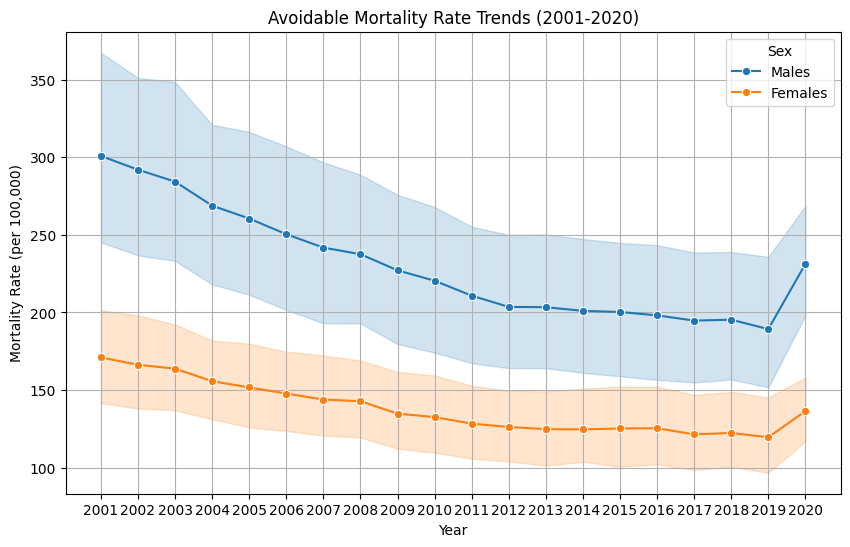

In [ ]:
#### 3. *Visualize Trends Over Time This step shows how to plot avoidable mortality rates over the years. python
# Plot trends over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=table_1, x='Year', y='Rate', hue='Sex', marker='o')
plt.title('Avoidable Mortality Rate Trends (2001-2020)')
plt.ylabel('Mortality Rate (per 100,000)')
plt.xlabel('Year')
plt.grid(True)
plt.show()

The higher avoidable mortality rate in males suggests potential differences in access to or effectiveness of preventive healthcare services, lifestyle factors, or occupational hazards.

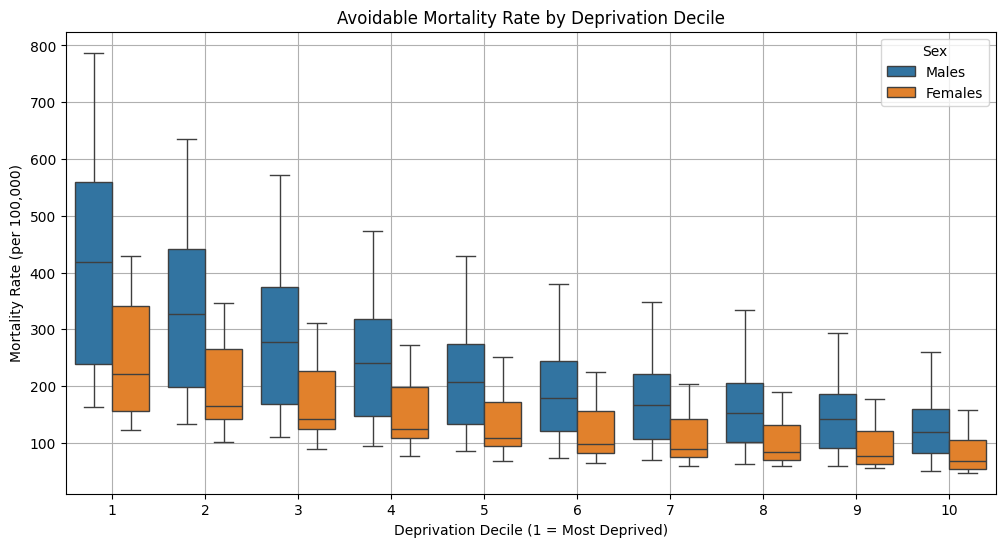

In [ ]:
#### 4. *Analyze Mortality by Deprivation Decile* Here’s a way to compare mortality rates across different deprivation decile : python
# Plot mortality rates by decile
plt.figure(figsize=(12, 6))
sns.boxplot(x='Decile', y='Rate', hue='Sex', data=table_1)
plt.title('Avoidable Mortality Rate by Deprivation Decile')
plt.ylabel('Mortality Rate (per 100,000)')
plt.xlabel('Deprivation Decile (1 = Most Deprived)')
plt.grid(True)
plt.show()

individuals in deprived areas likely experience more barriers to healthcare, lower quality care, or delays in receiving treatment.
Males in lower deciles seem to experience the worst outcomes, implying they might face greater health risks. Meanwhile, females, though also affected, show lower rates of avoidable mortality even in the most deprived groups.

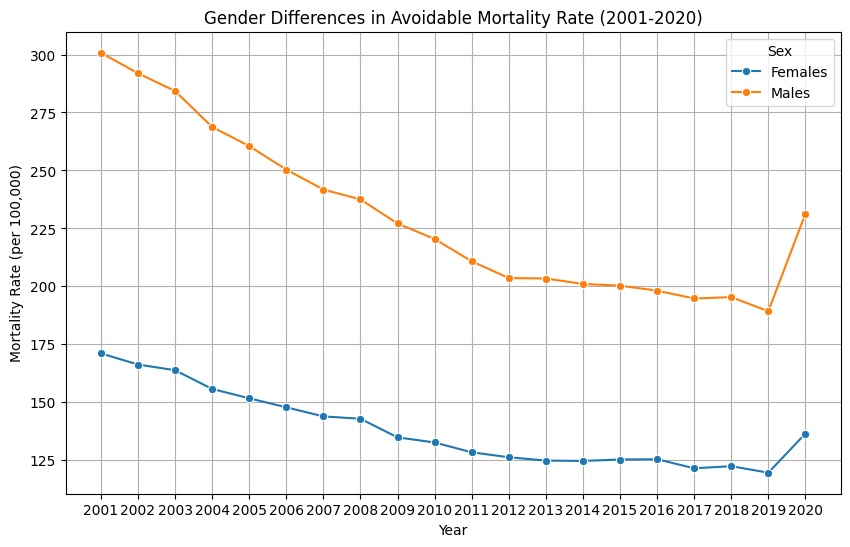

In [ ]:
#### 5. *Examine Gender Differences* To see the differences in avoidable mortality rates between males and females: python # Group data by sex and year to examine gender differences
gender_analysis = table_1.groupby(['Year', 'Sex'])['Rate'].mean().reset_index()

# Plot the gender differences over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=gender_analysis, x='Year', y='Rate', hue='Sex', marker='o')
plt.title('Gender Differences in Avoidable Mortality Rate (2001-2020)')
plt.ylabel('Mortality Rate (per 100,000)')
plt.xlabel('Year')
plt.grid(True)
plt.show()

Men have consistently higher avoidable death rates than women, but both genders show improvement over time, with a sharp rise in 2020 likely due to COVID-19.

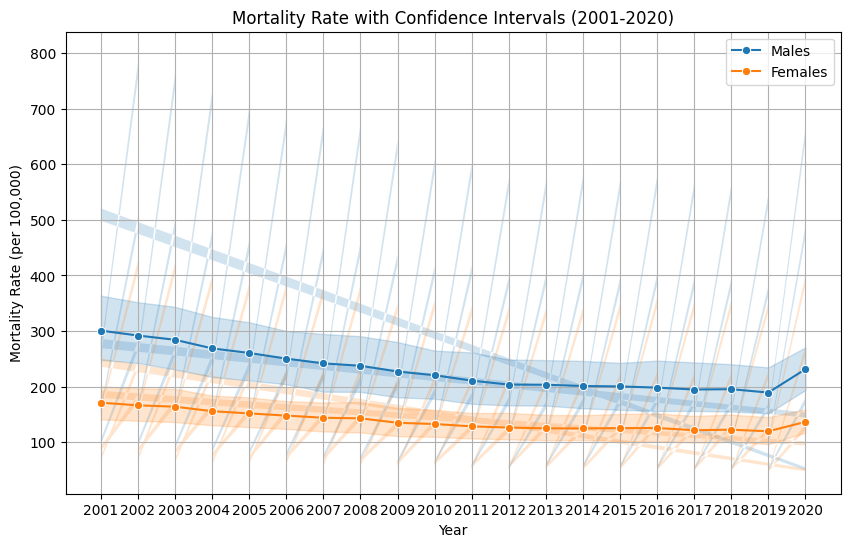

In [ ]:
#### 6. *Confidence Interval Analysis* You can also plot the confidence intervals to see the variation: python
# Plot with confidence intervals
plt.figure(figsize=(10, 6))
for sex in table_1['Sex'].unique():
    subset = table_1[table_1['Sex'] == sex]
    plt.fill_between(subset['Year'], subset['Lower CI'], subset['Upper CI'], alpha=0.2)
    sns.lineplot(x='Year', y='Rate', data=subset, marker='o', label=sex)

plt.title('Mortality Rate with Confidence Intervals (2001-2020)')
plt.ylabel('Mortality Rate (per 100,000)')
plt.xlabel('Year')
plt.grid(True)
plt.show()

 Both men and women see a steady decline in avoidable death rates with men experiencing more year-to-year fluctuations, and a significant increase in deaths in 2020.